<a href="https://colab.research.google.com/github/devyash-codes/FIFA-team-builder/blob/main/Dreamteambuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FIFA 4-3-3 Squad Optimizer with Python Libraries**

In [ ]:
# IMPORTING LIBRARIES FOR PROJECT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# IMPORTING DATASET TO COLAB NOTEBOOK
from google.colab import files
uploaded = files.upload()  # select your players_22.csv

# load first csv
filename = next(iter(uploaded))
df = pd.read_csv(filename, low_memory=False)
df.head()


Saving players_22.csv to players_22 (2).csv


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
# CREATING 4 NEW COLUMNS WITH DATA FROM DATASET
# Pick your actual column names here:
name_col = 'short_name'          # change if your dataset has 'long_name' or 'name'
positions_col = 'player_positions' # change if 'positions' or 'Position'
overall_col = 'overall'
value_col = 'value_eur'           # may be 'value' or 'market_value'

# CREATING A DATAFRAME AND DISPLAYING THE DATA OF THE ABOVE 4 COLUMNS
df['player_name'] = df[name_col]
df['positions'] = df[positions_col]
df['overall'] = pd.to_numeric(df[overall_col], errors='coerce')
df['value_eur'] = pd.to_numeric(df[value_col], errors='coerce')

df[['player_name','positions','overall','value_eur']].head()


,player_name,positions,overall,value_eur
0,L. Messi,"RW, ST, CF",93,78000000.0
1,R. Lewandowski,ST,92,119500000.0
2,Cristiano Ronaldo,"ST, LW",91,45000000.0
3,Neymar Jr,"LW, CAM",91,129000000.0
4,K. De Bruyne,"CM, CAM",91,125500000.0


In [ ]:
# REDUCING EACH PLAYER TO ONE PRIMARY POSITION
df['primary_pos'] = df['positions'].astype(str).apply(lambda s: s.split()[0])

def map_group(p):
    if p == 'GK': return 'GK'
    if p in ['CB','LB','RB','LWB','RWB']: return 'DEF'
    if p in ['CDM','CM','CAM','RM','LM']: return 'MID'
    if p in ['ST','CF','LW','RW','LF','RF']: return 'FWD'
    return np.nan

df['group'] = df['primary_pos'].apply(map_group)

df_clean = df.dropna(subset=['group','overall','value_eur']).copy()
df_clean.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,player_name,positions,primary_pos,group
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,R. Lewandowski,ST,ST,FWD
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png,J. Oblak,GK,GK,GK
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,M. Neuer,GK,GK,GK
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png,M. ter Stegen,GK,GK,GK
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,H. Kane,ST,ST,FWD


In [ ]:
# CHOOSING FORMATION AND BUDGET FOR THE TEAM
formation = "4-3-3"    # def-mid-fwd
budget_eur = 200_000_000

def parse_formation(form):
    d,m,f = map(int, form.split('-'))
    return {'GK':1,'DEF':d,'MID':m,'FWD':f}

formation_counts = parse_formation(formation)
formation_counts


{'GK': 1, 'DEF': 4, 'MID': 3, 'FWD': 3}

In [ ]:
# THIS WILL PICK THE TOP RATED PLAYERS BY GROUP UNTIL WE FILL OUR SLOTS AND STAY UNDER BUDGET
def greedy_team_builder(df, formation_counts, budget):
    chosen = []
    remaining_budget = budget

    for group, count in formation_counts.items():
        group_candidates = df[df['group']==group].sort_values(['overall','value_eur'], ascending=[False,True])
        selected = []
        for idx, row in group_candidates.iterrows():
            if len(selected) == count:
                break
            if row['value_eur'] <= remaining_budget:
                selected.append(row)
                remaining_budget -= row['value_eur']
        chosen.extend(selected)
    team_df = pd.DataFrame(chosen)
    return team_df

dream_team = greedy_team_builder(df_clean, formation_counts, budget_eur)
dream_team[['player_name','primary_pos','group','overall','value_eur']]


,player_name,primary_pos,group,overall,value_eur
5,J. Oblak,GK,GK,91,112000000.0
15,V. van Dijk,CB,DEF,89,86000000.0
1142,J. Pinola,CB,DEF,76,1300000.0
2437,J. Insaurralde,CB,DEF,73,550000.0
8698,N. Cabrera,CB,DEF,66,150000.0


In [ ]:
# CHECKING TOTAL COST AND RATINGS
print("Team size:", dream_team.shape[0])
print("Total value (€):", dream_team['value_eur'].sum())
print("Average rating:", dream_team['overall'].mean())
dream_team[['player_name','primary_pos','group','overall','value_eur']].reset_index(drop=True)


Team size: 5
Total value (€): 200000000.0
Average rating: 79.0


,player_name,primary_pos,group,overall,value_eur
0,J. Oblak,GK,GK,91,112000000.0
1,V. van Dijk,CB,DEF,89,86000000.0
2,J. Pinola,CB,DEF,76,1300000.0
3,J. Insaurralde,CB,DEF,73,550000.0
4,N. Cabrera,CB,DEF,66,150000.0


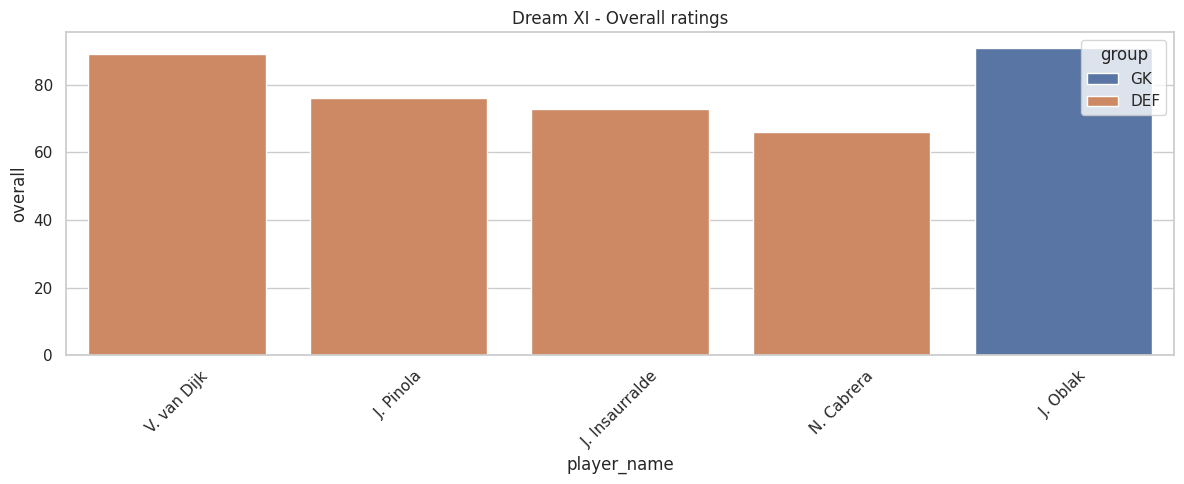

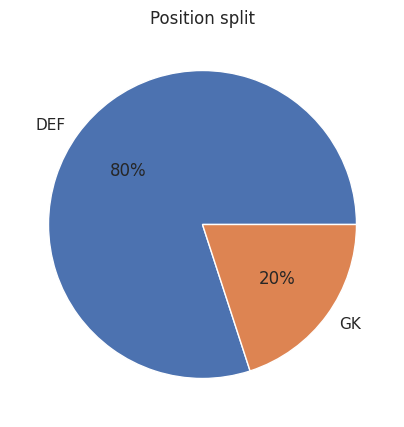

In [ ]:
# VISUALISING USING BAR CHARTS AND PIE CHARTS
plt.figure(figsize=(12,5))
order = dream_team.sort_values(['group','overall'], ascending=[True,False])['player_name']
sns.barplot(data=dream_team, x='player_name', y='overall', hue='group', order=order)
plt.xticks(rotation=45)
plt.title("Dream XI - Overall ratings")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
dream_team['group'].value_counts().plot.pie(autopct='%1.0f%%', ylabel='')
plt.title("Position split")
plt.show()


In [ ]:
dream_team.to_csv('dream_team.csv', index=False)
print("Saved dream_team.csv")


Saved dream_team.csv
